In [7]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\RUTHVIK\Desktop\internship\Innomatics proj\Task 3 - Flipkart Laptop Data - Business Insights on Product Pricing\resourses\data\laptop_details.csv", encoding= 'unicode_escape')
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"?36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"?39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"?32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"?49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"?49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


# Feature Engineering

In [9]:
# Converting MRP attribute to int
df['MRP'] = df['MRP'].apply(lambda x : x.replace('?', ''))
df['MRP'] = df['MRP'].apply(lambda x : x.replace(',', ''))
df['MRP'] = df['MRP'].astype(int)
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    int32  
 3   Feature  720 non-null    object 
dtypes: float64(1), int32(1), object(2)
memory usage: 19.8+ KB


In [11]:
# Brand
regex = r'^\w+'
df['Brand']=df['Product'].apply(lambda x : re.findall(regex, x))
df['Brand']= df['Brand'].apply(lambda x : ''.join(x))
df.head()

,Product,Rating,MRP,Feature,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS


In [12]:
# Processor type
regex= r'(?:AMD|Intel|M1|Apple)[\s\w]+Processor'
df['Processor']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['Processor']=df['Processor'].apply(lambda x : ''.join(x))
df['Processor']=df['Processor'].apply(lambda x: x.replace(" Processor", ""))
df.head()

,Product,Rating,MRP,Feature,Brand,Processor
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i3
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD Ryzen 5 Hexa Core
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i5


In [13]:
# OS
regex = r'[\d]+[\s]bit[\s\w]+Operating System|[\(Windows)\d\s]+Operating System|[\(Chrome|Mac OS)]+Operating System'
df['OS']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['OS']=df['OS'].apply(lambda x : ''.join(x))
df['OS']=df['OS'].apply(lambda x: x.replace(" Operating System", ""))
df.head()

,Product,Rating,MRP,Feature,Brand,Processor,OS
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3,64 bit Windows 11
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3,64 bit Windows 11
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i3,64 bit Windows 11
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD Ryzen 5 Hexa Core,64 bit Windows 10
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i5,Windows 11


In [14]:
# RAM
regex = r'\d+\sGB[\s\w]+RAM'
df['RAM'] = df['Feature'].apply(lambda x : re.findall(regex, x))
df['RAM'] = df['RAM'].apply(lambda x : ''.join(x))
df['RAM'] = df['RAM'].apply(lambda x : x.replace("RAM",""))
df.head()

,Product,Rating,MRP,Feature,Brand,Processor,OS,RAM
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3,64 bit Windows 11,8 GB DDR4
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3,64 bit Windows 11,8 GB DDR4
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i3,64 bit Windows 11,8 GB DDR4
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD Ryzen 5 Hexa Core,64 bit Windows 10,8 GB DDR4
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i5,Windows 11,8 GB DDR4


In [15]:
# Storage
regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD|EMMC)'
df['Storage']=df['Product'].apply(lambda x : re.findall(regex, x))
df['Storage']=df['Storage'].apply(lambda x : ''.join(x))
df

,Product,Rating,MRP,Feature,Brand,Processor,OS,RAM,Storage
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3,64 bit Windows 11,8 GB DDR4,256 GB SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3,64 bit Windows 11,8 GB DDR4,512 GB SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i3,64 bit Windows 11,8 GB DDR4,512 GB SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD Ryzen 5 Hexa Core,64 bit Windows 10,8 GB DDR4,512 GB SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i5,Windows 11,8 GB DDR4,512 GB SSD
...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,Intel Celeron Dual Core,MChrome,4 GB LPDDR4,64 GB EMMC
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,Lenovo,AMD Ryzen 7 Octa Core,64 bit Windows 11,8 GB DDR4,512 GB SSD
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,194990,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,ASUS,AMD Ryzen 9 Octa Core,64 bit Windows 11,16 GB DDR5,1 TB SSD
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,ASUS,Intel Core i7,64 bit Windows 11,16 GB LPDDR5,512 GB SSD


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    int32  
 3   Feature    720 non-null    object 
 4   Brand      720 non-null    object 
 5   Processor  720 non-null    object 
 6   OS         720 non-null    object 
 7   RAM        720 non-null    object 
 8   Storage    720 non-null    object 
dtypes: float64(1), int32(1), object(7)
memory usage: 47.9+ KB


In [17]:
df['Brand'].unique()

array(['Lenovo', 'ASUS', 'HP', 'DELL', 'RedmiBook', 'realme', 'acer',
       'MSI', 'APPLE', 'Infinix', 'SAMSUNG', 'Ultimus', 'Vaio',
       'GIGABYTE', 'Nokia', 'ALIENWARE'], dtype=object)

In [18]:
df['Processor'].unique()

array(['Intel Core i3', 'AMD Ryzen 5 Hexa Core', 'Intel Core i5',
       'Intel OptaneIntel Core i3', 'AMD Ryzen 7 Quad Core',
       'AMD Ryzen 5 Quad Core', 'AMD Ryzen 9 Octa Core',
       'AMD Ryzen 7 Octa Core', 'Apple M1', 'Intel Celeron Dual Core',
       'AMD Ryzen 3 Dual Core', 'AMD Athlon Dual Core',
       'Intel Evo Core i5Intel Core i5', 'AMD Ryzen 3 Quad Core',
       'Apple M2', 'Intel Celeron Quad Core', 'Intel Core i7',
       'Apple M1 Pro', '', 'Intel Pentium Silver', 'Apple M1 Max',
       'Intel Core i9', 'AMD Ryzen 5 Dual Core',
       'Intel Pentium Quad Core', 'AMD Dual Core',
       'AMD Ryzen 3 Hexa Core'], dtype=object)

In [19]:
df[df['Processor']=='']

,Product,Rating,MRP,Feature,Brand,Processor,OS,RAM,Storage
83,SAMSUNG Galaxy Book Go Snapdragon 7c Gen 2 - (...,4.4,32990,Qualcomm Snapdragon 7c Gen 2 Processor4 GB LPD...,SAMSUNG,,Windows 11,4 GB LPDDR4X,128 GB EMMC


**This particular observation has many null values. Hence, it can be removed.**

In [20]:
df=df[df['Processor']!='']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 0 to 719
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    719 non-null    object 
 1   Rating     580 non-null    float64
 2   MRP        719 non-null    int32  
 3   Feature    719 non-null    object 
 4   Brand      719 non-null    object 
 5   Processor  719 non-null    object 
 6   OS         719 non-null    object 
 7   RAM        719 non-null    object 
 8   Storage    719 non-null    object 
dtypes: float64(1), int32(1), object(7)
memory usage: 53.4+ KB


In [21]:
df['Processor'].unique()

array(['Intel Core i3', 'AMD Ryzen 5 Hexa Core', 'Intel Core i5',
       'Intel OptaneIntel Core i3', 'AMD Ryzen 7 Quad Core',
       'AMD Ryzen 5 Quad Core', 'AMD Ryzen 9 Octa Core',
       'AMD Ryzen 7 Octa Core', 'Apple M1', 'Intel Celeron Dual Core',
       'AMD Ryzen 3 Dual Core', 'AMD Athlon Dual Core',
       'Intel Evo Core i5Intel Core i5', 'AMD Ryzen 3 Quad Core',
       'Apple M2', 'Intel Celeron Quad Core', 'Intel Core i7',
       'Apple M1 Pro', 'Intel Pentium Silver', 'Apple M1 Max',
       'Intel Core i9', 'AMD Ryzen 5 Dual Core',
       'Intel Pentium Quad Core', 'AMD Dual Core',
       'AMD Ryzen 3 Hexa Core'], dtype=object)

In [22]:
df['OS'].unique()

array(['64 bit Windows 11', '64 bit Windows 10', 'Windows 11', 'MMac OS',
       'OS', 'Windows 10', 'MChrome', '32 bit Windows 11',
       '5Operating System64 bit Windows 10', '64 bit DOS',
       ' Windows 1064 bit Windows 10', '64 bit Chrome'], dtype=object)

In [23]:
df['OS']=df['OS'].apply(lambda x : x.replace("64 bit ","").replace('MMac OS','MAC').replace('OS','MAC').replace('MChrome','Chrome').replace('32 bit ',''))
df['OS'].unique()

C:\Users\RUTHVIK\AppData\Local\Temp\ipykernel_16168\1354644143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OS']=df['OS'].apply(lambda x : x.replace("64 bit ","").replace('MMac OS','MAC').replace('OS','MAC').replace('MChrome','Chrome').replace('32 bit ',''))


array(['Windows 11', 'Windows 10', 'MAC', 'Chrome',
       '5Operating SystemWindows 10', 'DMAC', ' Windows 10Windows 10'],
      dtype=object)

In [24]:
df['OS']=df['OS'].apply(lambda x : x.replace('5Operating System','').replace('DMAC','DOS').replace(' Windows 10',''))
df['OS'].unique()

C:\Users\RUTHVIK\AppData\Local\Temp\ipykernel_16168\3203164883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OS']=df['OS'].apply(lambda x : x.replace('5Operating System','').replace('DMAC','DOS').replace(' Windows 10',''))


array(['Windows 11', 'Windows 10', 'MAC', 'Chrome', 'DOS'], dtype=object)

In [25]:
df['RAM'].unique()

array(['8 GB DDR4 ', '16 GB DDR4 ', '16 GB DDR5 ', '4 GB LPDDR4 ',
       '4 GB DDR4 ', '8 GB Unified Memory ', '8 GB LPDDR4X ',
       '16 GB Unified Memory ', '16 GB LPDDR4X ', '16 GB LPDDR5 ',
       '32 GB Unified Memory ', '4 GB LPDDR4X ', '16 GB LPDDR4 ',
       '32 GB DDR5 ',
       '128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and 8 GB DDR4 ',
       '8 GB DDR5 ', '32 GB DDR4 ', '32 GB LPDDR4X ', '16 GB LPDDR3 '],
      dtype=object)

In [26]:
df['RAM']=df['RAM'].apply(lambda x: x.replace("128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and 8 GB DDR4 ","8 GB DDR4"))
df['RAM']=df['RAM'].apply(lambda x: x.replace("Unified Memory","Unified"))
df['RAM'].unique()

C:\Users\RUTHVIK\AppData\Local\Temp\ipykernel_16168\517777125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RAM']=df['RAM'].apply(lambda x: x.replace("128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and 8 GB DDR4 ","8 GB DDR4"))
C:\Users\RUTHVIK\AppData\Local\Temp\ipykernel_16168\517777125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RAM']=df['RAM'].apply(lambda x: x.replace("Unified Memory","Unified"))


array(['8 GB DDR4 ', '16 GB DDR4 ', '16 GB DDR5 ', '4 GB LPDDR4 ',
       '4 GB DDR4 ', '8 GB Unified ', '8 GB LPDDR4X ', '16 GB Unified ',
       '16 GB LPDDR4X ', '16 GB LPDDR5 ', '32 GB Unified ',
       '4 GB LPDDR4X ', '16 GB LPDDR4 ', '32 GB DDR5 ', '8 GB DDR4',
       '8 GB DDR5 ', '32 GB DDR4 ', '32 GB LPDDR4X ', '16 GB LPDDR3 '],
      dtype=object)

In [27]:
df[['RAM Size','GB', 'RAM Type','x']]=df['RAM'].str.split(' ', expand=True)
df.drop(['GB','RAM','x'], axis=1, inplace=True)
df['RAM Size']=df['RAM Size']+"GB"
df.head()

C:\Users\RUTHVIK\AppData\Local\Temp\ipykernel_16168\3285123229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['RAM Size','GB', 'RAM Type','x']]=df['RAM'].str.split(' ', expand=True)
C:\Users\RUTHVIK\AppData\Local\Temp\ipykernel_16168\3285123229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['RAM Size','GB', 'RAM Type','x']]=df['RAM'].str.split(' ', expand=True)
C:\Users\RUTHVIK\AppData\Local\Temp\ipykernel_16168\3285123229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a cop

,Product,Rating,MRP,Feature,Brand,Processor,OS,Storage,RAM Size,RAM Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3,Windows 11,256 GB SSD,8GB,DDR4
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3,Windows 11,512 GB SSD,8GB,DDR4
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i3,Windows 11,512 GB SSD,8GB,DDR4
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD Ryzen 5 Hexa Core,Windows 10,512 GB SSD,8GB,DDR4
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i5,Windows 11,512 GB SSD,8GB,DDR4


In [28]:
df['RAM Size'].unique()

array(['8GB', '16GB', '4GB', '32GB'], dtype=object)

In [29]:
df['RAM Type'].unique()

array(['DDR4', 'DDR5', 'LPDDR4', 'Unified', 'LPDDR4X', 'LPDDR5', 'LPDDR3'],
      dtype=object)

In [30]:
df['Storage'].unique()

array(['256 GB SSD', '512 GB SSD', '1 TB HDD256 GB SSD', '1 TB SSD',
       '256 GB HDD256 GB SSD', '64 GB EMMC', '1 TB HDD', '128 GB SSD',
       '32 GB EMMC', '1 TB HDD512 GB SSD', '1 TB HDD128 GB SSD',
       '2 TB SSD', '128 GB EMMC'], dtype=object)

In [31]:
df['Storage'].replace({'256 GB SSD':'256GB SSD'}, inplace=True)
df['Storage'].replace({'512 GB SSD':'512GB SSD'}, inplace=True)
df['Storage'].replace({'1 TB SSD':'1TB SSD'}, inplace=True)
df['Storage'].replace({'1 TB HDD':'1TB HDD'}, inplace=True)
df['Storage'].replace({'128 GB SSD':'128GB SSD'}, inplace=True)
df['Storage'].replace({'2 TB SSD':'2TB SSD'}, inplace=True)
df['Storage'].replace({'1 TB HDD256 GB SSD':'1TB HDD'}, inplace=True)
df['Storage'].replace({'256 GB HDD256 GB SSD':'256GB HDD'}, inplace=True)
df['Storage'].replace({'1 TB HDD512 GB SSD':'1TB HDD'}, inplace=True)
df['Storage'].replace({'128 GB SSD1 TB HDD128 GB SSD':'1TB HDD'}, inplace=True)
df['Storage'].replace({'64 GB EMMC':'64GB EMMC'}, inplace=True)
df['Storage'].replace({'32 GB EMMC':'32GB EMMC'}, inplace=True)
df['Storage'].replace({'128 GB EMMC':'128GB EMMC'}, inplace=True)
df['Storage'].replace({'1 TB HDD128 GB SSD':'1TB HDD'}, inplace=True)
df['Storage'].unique()

C:\Users\RUTHVIK\AppData\Local\Temp\ipykernel_16168\3154970843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Storage'].replace({'256 GB SSD':'256GB SSD'}, inplace=True)
C:\Users\RUTHVIK\AppData\Local\Temp\ipykernel_16168\3154970843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Storage'].replace({'512 GB SSD':'512GB SSD'}, inplace=True)
C:\Users\RUTHVIK\AppData\Local\Temp\ipykernel_16168\3154970843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

array(['256GB SSD', '512GB SSD', '1TB HDD', '1TB SSD', '256GB HDD',
       '64GB EMMC', '128GB SSD', '32GB EMMC', '2TB SSD', '128GB EMMC'],
      dtype=object)

In [32]:
df[['Disc Size','Disc Type']]=df['Storage'].str.split(' ', expand=True)
df.drop(['Storage'], axis=1, inplace=True)
df.head()

C:\Users\RUTHVIK\AppData\Local\Temp\ipykernel_16168\2076833193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Disc Size','Disc Type']]=df['Storage'].str.split(' ', expand=True)
C:\Users\RUTHVIK\AppData\Local\Temp\ipykernel_16168\2076833193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Disc Size','Disc Type']]=df['Storage'].str.split(' ', expand=True)
C:\Users\RUTHVIK\AppData\Local\Temp\ipykernel_16168\2076833193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,Product,Rating,MRP,Feature,Brand,Processor,OS,RAM Size,RAM Type,Disc Size,Disc Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3,Windows 11,8GB,DDR4,256GB,SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3,Windows 11,8GB,DDR4,512GB,SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i3,Windows 11,8GB,DDR4,512GB,SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD Ryzen 5 Hexa Core,Windows 10,8GB,DDR4,512GB,SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i5,Windows 11,8GB,DDR4,512GB,SSD


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 0 to 719
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    719 non-null    object 
 1   Rating     580 non-null    float64
 2   MRP        719 non-null    int32  
 3   Feature    719 non-null    object 
 4   Brand      719 non-null    object 
 5   Processor  719 non-null    object 
 6   OS         719 non-null    object 
 7   RAM Size   719 non-null    object 
 8   RAM Type   719 non-null    object 
 9   Disc Size  719 non-null    object 
 10  Disc Type  719 non-null    object 
dtypes: float64(1), int32(1), object(9)
memory usage: 64.6+ KB


**Rating does not impact the price of the laptops. Hence it can be dropped**

In [34]:
df=df.drop('Rating', axis=1)
df.head()

,Product,MRP,Feature,Brand,Processor,OS,RAM Size,RAM Type,Disc Size,Disc Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3,Windows 11,8GB,DDR4,256GB,SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3,Windows 11,8GB,DDR4,512GB,SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i3,Windows 11,8GB,DDR4,512GB,SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD Ryzen 5 Hexa Core,Windows 10,8GB,DDR4,512GB,SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i5,Windows 11,8GB,DDR4,512GB,SSD


# Univariate Analysis on MRP 

In [35]:
df['MRP'].describe()

count       719.000000
mean      81673.453408
std       61569.040553
min       14990.000000
25%       39394.500000
50%       59990.000000
75%       95490.000000
max      434830.000000
Name: MRP, dtype: float64

In [36]:
df['MRP'].median()

59990.0

<Axes: >

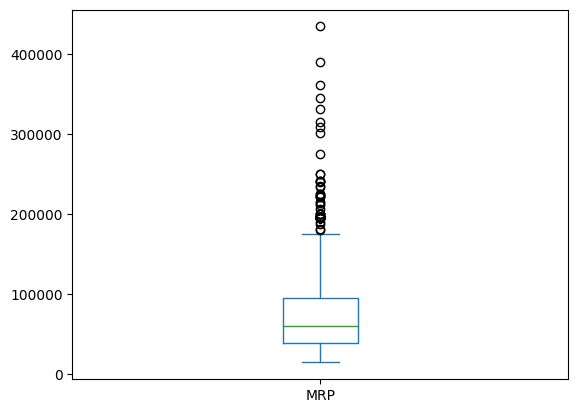

In [37]:
# Check for Outliers
df['MRP'].plot(kind='box')

<Axes: ylabel='Frequency'>

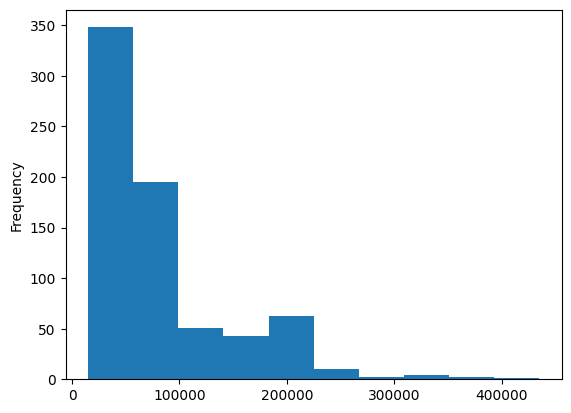

In [38]:
df['MRP'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

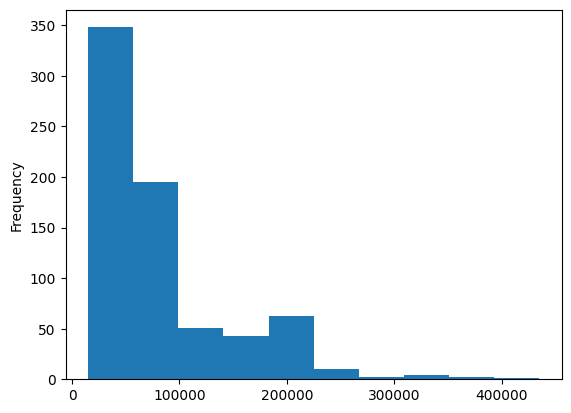

In [39]:
# Transformation
df['MRP'].apply(lambda x : np.log(x))
df['MRP'].plot(kind = 'hist')

<Axes: ylabel='Density'>

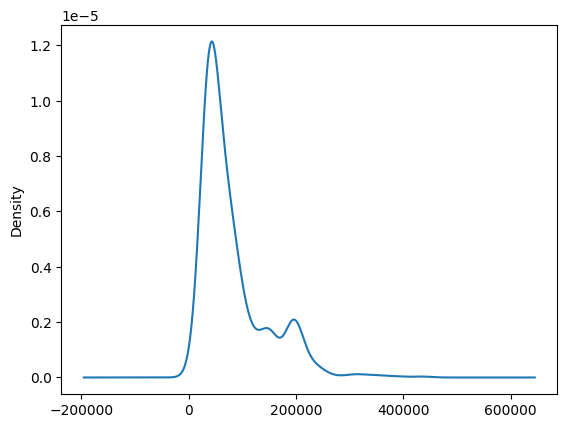

In [40]:
df['MRP'].plot(kind = 'kde')

In [41]:
# Univariate Analysis on Brand
df['Brand'].value_counts()

ASUS         251
Lenovo       196
HP            61
DELL          61
acer          35
RedmiBook     31
MSI           30
Infinix       20
APPLE         19
realme         6
ALIENWARE      3
Ultimus        2
SAMSUNG        1
Vaio           1
GIGABYTE       1
Nokia          1
Name: Brand, dtype: int64

<Axes: >

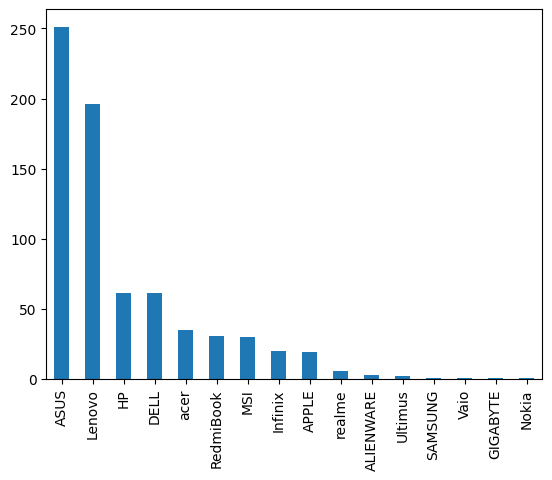

In [42]:
df['Brand'].value_counts().plot(kind = 'bar')

# Bivariate Analysis

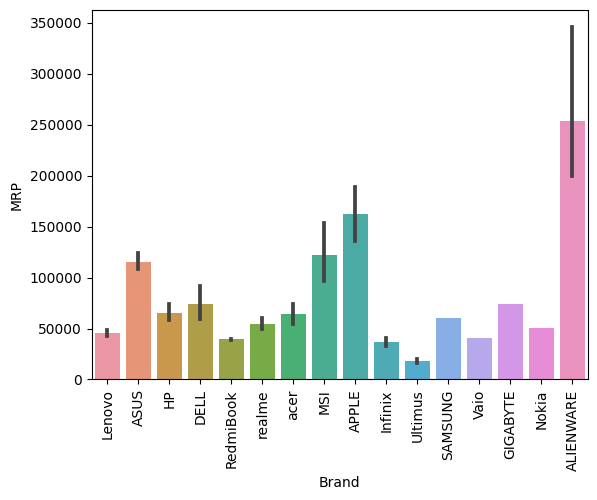

In [43]:
# price and brand
sns.barplot(x=df['Brand'],y=df['MRP'])
plt.xticks(rotation='vertical')
plt.show()

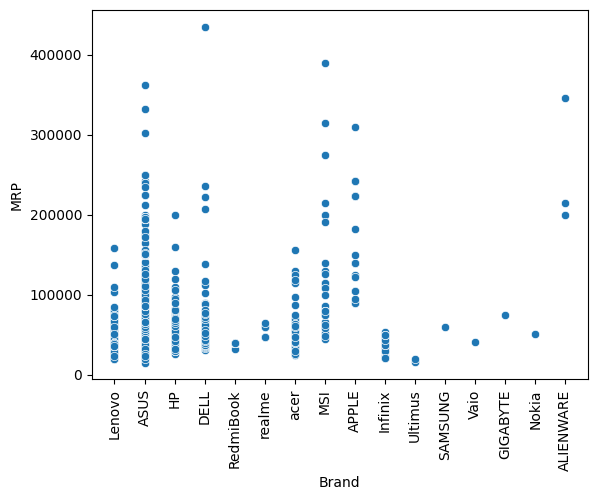

In [44]:
sns.scatterplot(x=df['Brand'],y=df['MRP'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

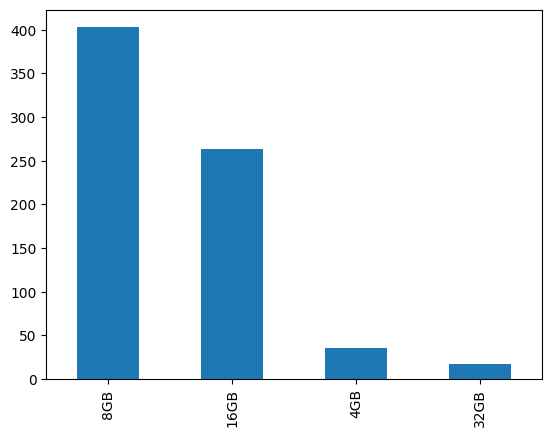

In [45]:
df['RAM Size'].value_counts().plot(kind = 'bar')

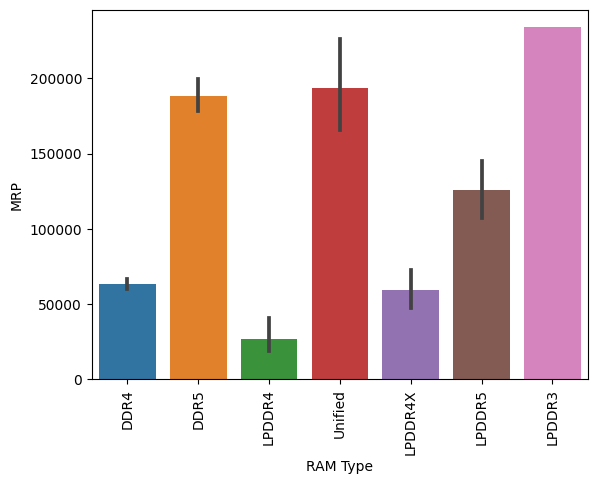

In [46]:
sns.barplot(x=df['RAM Type'],y=df['MRP'])
plt.xticks(rotation='vertical')
plt.show()

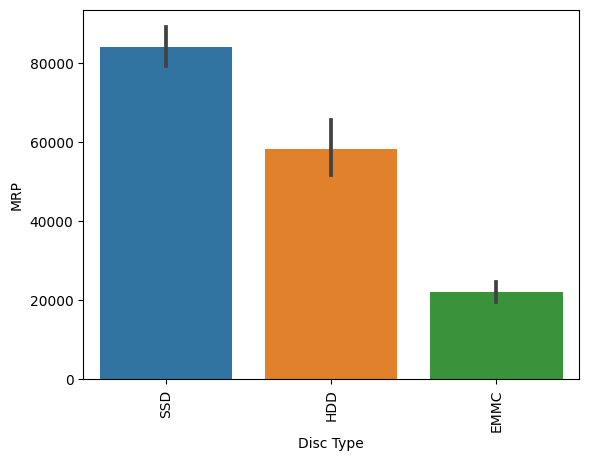

In [47]:
sns.barplot(x=df['Disc Type'],y=df['MRP'])
plt.xticks(rotation='vertical')
plt.show()

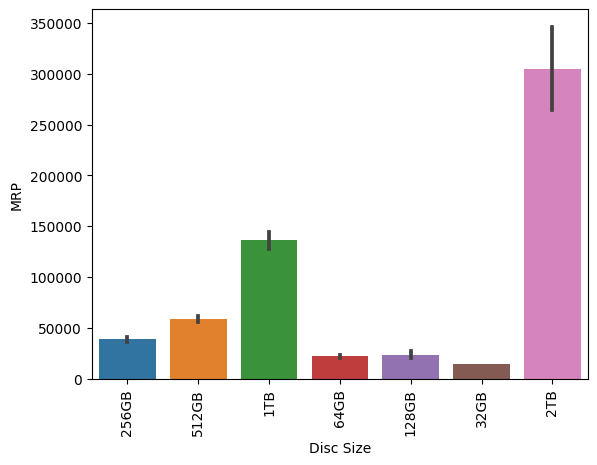

In [48]:
sns.barplot(x=df['Disc Size'],y=df['MRP'])
plt.xticks(rotation='vertical')
plt.show()

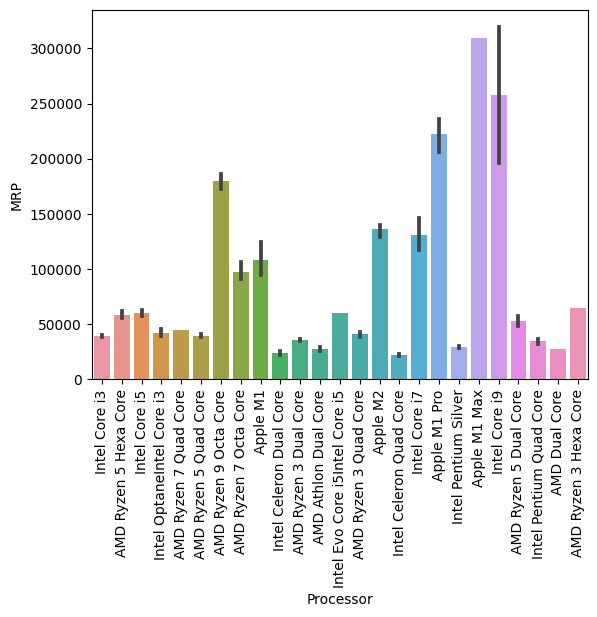

In [49]:
sns.barplot(x=df['Processor'],y=df['MRP'])
plt.xticks(rotation='vertical')
plt.show()

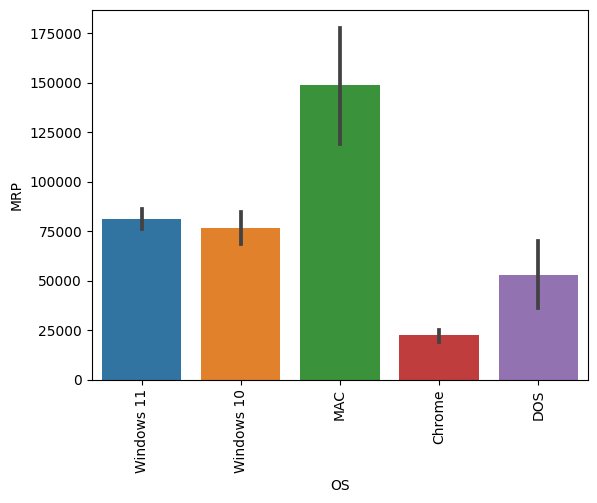

In [50]:
sns.barplot(x=df['OS'],y=df['MRP'])
plt.xticks(rotation='vertical')
plt.show()

*Label Encoding*

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 0 to 719
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Product    719 non-null    object
 1   MRP        719 non-null    int32 
 2   Feature    719 non-null    object
 3   Brand      719 non-null    object
 4   Processor  719 non-null    object
 5   OS         719 non-null    object
 6   RAM Size   719 non-null    object
 7   RAM Type   719 non-null    object
 8   Disc Size  719 non-null    object
 9   Disc Type  719 non-null    object
dtypes: int32(1), object(9)
memory usage: 59.0+ KB


In [52]:
df=df.drop(columns=['Product','Feature'])
df

,MRP,Brand,Processor,OS,RAM Size,RAM Type,Disc Size,Disc Type
0,36990,Lenovo,Intel Core i3,Windows 11,8GB,DDR4,256GB,SSD
1,39990,Lenovo,Intel Core i3,Windows 11,8GB,DDR4,512GB,SSD
2,32990,ASUS,Intel Core i3,Windows 11,8GB,DDR4,512GB,SSD
3,49990,HP,AMD Ryzen 5 Hexa Core,Windows 10,8GB,DDR4,512GB,SSD
4,49990,ASUS,Intel Core i5,Windows 11,8GB,DDR4,512GB,SSD
...,...,...,...,...,...,...,...,...
715,23490,ASUS,Intel Celeron Dual Core,Chrome,4GB,LPDDR4,64GB,EMMC
716,73490,Lenovo,AMD Ryzen 7 Octa Core,Windows 11,8GB,DDR4,512GB,SSD
717,194990,ASUS,AMD Ryzen 9 Octa Core,Windows 11,16GB,DDR5,1TB,SSD
718,125990,ASUS,Intel Core i7,Windows 11,16GB,LPDDR5,512GB,SSD


In [53]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['Brand']=le.fit_transform(df['Brand'])
df['Processor'] = le.fit_transform(df['Processor'])
df['OS'] = le.fit_transform(df['OS'])
df['RAM Size'] = le.fit_transform(df['RAM Size'])
df['RAM Type'] = le.fit_transform(df['RAM Type'])
df['Disc Size'] = le.fit_transform(df['Disc Size'])
df['Disc Type'] = le.fit_transform(df['Disc Type'])
df

,MRP,Brand,Processor,OS,RAM Size,RAM Type,Disc Size,Disc Type
0,36990,7,17,4,3,0,2,2
1,39990,7,17,4,3,0,5,2
2,32990,2,17,4,3,0,5,2
3,49990,5,6,3,3,0,5,2
4,49990,2,18,4,3,0,5,2
...,...,...,...,...,...,...,...,...
715,23490,2,15,0,2,3,6,0
716,73490,7,8,4,3,0,5,2
717,194990,2,10,4,0,1,1,2
718,125990,2,19,4,0,5,5,2


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 0 to 719
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   MRP        719 non-null    int32
 1   Brand      719 non-null    int32
 2   Processor  719 non-null    int32
 3   OS         719 non-null    int32
 4   RAM Size   719 non-null    int32
 5   RAM Type   719 non-null    int32
 6   Disc Size  719 non-null    int32
 7   Disc Type  719 non-null    int32
dtypes: int32(8)
memory usage: 28.1 KB


In [55]:
X = df.drop('MRP', axis = 1).values
y = df['MRP'].values

from sklearn.preprocessing import StandardScaler, MinMaxScaler
std=StandardScaler()
X=std.fit_transform(X)

print(X)

[[ 0.54670838  0.70280017  0.45322049 ... -0.40781508 -0.68193647
   0.27880135]
 [ 0.54670838  0.70280017  0.45322049 ... -0.40781508  0.90826565
   0.27880135]
 [-0.9189267   0.70280017  0.45322049 ... -0.40781508  0.90826565
   0.27880135]
 ...
 [-0.9189267  -0.5453273   0.45322049 ...  0.36584994 -1.21200384
   0.27880135]
 [-0.9189267   1.05940802  0.45322049 ...  3.46051002  0.90826565
   0.27880135]
 [ 0.54670838  0.88110409 -1.13636748 ... -0.40781508 -1.21200384
  -2.75844366]]


**Split into training and testing set**

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(575, 7)
(575,)
(144, 7)
(144,)


# Neural networks for predicting the laptop priceMachine Learning Regression Models



In [57]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr=lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

from sklearn.metrics import mean_squared_error as mse, r2_score

MSE=mse(y_pred,y_test).round(2)
RMSE=np.sqrt(MSE).round(2)
R2=r2_score(y_pred, y_test)

results=pd.DataFrame({"Model":["Linear Regression"], "MSE":[MSE], "RMSE":[RMSE], "R2 Score":[R2]})
results


,Model,MSE,RMSE,R2 Score
0,Linear Regression,1.873579e+09,43284.86,-0.058025


In [58]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor(random_state=0)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
MSE=mse(y_pred,y_test).round(2)
RMSE=np.sqrt(MSE).round(2)
R2=r2_score(y_pred, y_test)

result=pd.DataFrame({"Model":["Decision Tree Regression"], "MSE":[MSE], "RMSE":[RMSE], "R2 Score":[R2]})

results=pd.concat([results,result])
results

,Model,MSE,RMSE,R2 Score
0,Linear Regression,1.873579e+09,43284.86,-0.058025
0,Decision Tree Regression,2.511516e+08,15847.76,0.902647


In [59]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
MSE=mse(y_pred,y_test).round(2)
RMSE=np.sqrt(MSE).round(2)
R2=r2_score(y_pred, y_test)

result=pd.DataFrame({"Model":["Random Forest Regression"], "MSE":[MSE], "RMSE":[RMSE], "R2 Score":[R2]})

results=pd.concat([results,result])
results

,Model,MSE,RMSE,R2 Score
0,Linear Regression,1.873579e+09,43284.86,-0.058025
0,Decision Tree Regression,2.511516e+08,15847.76,0.902647
0,Random Forest Regression,2.344513e+08,15311.80,0.906180


In [60]:
# Gradient boosting
from sklearn.ensemble import GradientBoostingRegressor

grb= GradientBoostingRegressor(n_estimators =100,random_state =0) 
grb.fit(x_train, y_train) 
y_pred = grb.predict(x_test)
MSE=mse(y_pred,y_test).round(2)
RMSE=np.sqrt(MSE).round(2)
R2=r2_score(y_pred, y_test)

result=pd.DataFrame({"Model":["Gradient Boosting Regression"], "MSE":[MSE], "RMSE":[RMSE], "R2 Score":[R2]})

results=pd.concat([results,result])
results

,Model,MSE,RMSE,R2 Score
0,Linear Regression,1.873579e+09,43284.86,-0.058025
0,Decision Tree Regression,2.511516e+08,15847.76,0.902647
0,Random Forest Regression,2.344513e+08,15311.80,0.906180
0,Gradient Boosting Regression,1.974534e+08,14051.81,0.923013


In [61]:
#  ADA Boost
from sklearn.ensemble import AdaBoostRegressor

ada=AdaBoostRegressor(n_estimators=100,learning_rate=0.001,random_state=0)
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
MSE=mse(y_pred,y_test).round(2)
RMSE=np.sqrt(MSE).round(2)
R2=r2_score(y_pred, y_test)

result=pd.DataFrame({"Model":["ADA Boost Regression"], "MSE":[MSE], "RMSE":[RMSE], "R2 Score":[R2]})

results=pd.concat([results,result])
results

,Model,MSE,RMSE,R2 Score
0,Linear Regression,1.873579e+09,43284.86,-0.058025
0,Decision Tree Regression,2.511516e+08,15847.76,0.902647
0,Random Forest Regression,2.344513e+08,15311.80,0.906180
0,Gradient Boosting Regression,1.974534e+08,14051.81,0.923013
0,ADA Boost Regression,5.582229e+08,23626.74,0.718593


In [62]:
# XG boost
from xgboost import XGBRegressor

xgb=XGBRegressor(verbosity=0) 
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
MSE=mse(y_pred,y_test).round(2)
RMSE=np.sqrt(MSE).round(2)
R2=r2_score(y_pred, y_test)

result=pd.DataFrame({"Model":["XG Boost Regression"], "MSE":[MSE], "RMSE":[RMSE], "R2 Score":[R2]})

results=pd.concat([results,result])
results

,Model,MSE,RMSE,R2 Score
0,Linear Regression,1.873579e+09,43284.86,-0.058025
0,Decision Tree Regression,2.511516e+08,15847.76,0.902647
0,Random Forest Regression,2.344513e+08,15311.80,0.906180
0,Gradient Boosting Regression,1.974534e+08,14051.81,0.923013
0,ADA Boost Regression,5.582229e+08,23626.74,0.718593
0,XG Boost Regression,2.005710e+08,14162.31,0.922270


Gradient Boosting Regression	has highest R2 Score and least RMSE value

In [63]:
from sklearn.model_selection import cross_val_score, KFold, ShuffleSplit

grb= GradientBoostingRegressor(n_estimators =50,random_state =42) 

k=ShuffleSplit(n_splits=20, test_size=0.2, random_state=20)
score=cross_val_score(grb, X,y, cv=k)
print("Cross validations Score:\n", score)
print("Average Cross validations Score:", score.mean())
print("Maximum Cross validations Score:", score.max())
print("Minimum Cross validations Score:", score.min())

Cross validations Score:
 [0.89485123 0.92625165 0.92277819 0.81303195 0.85398295 0.9199003
 0.87086344 0.92933728 0.91360106 0.92271301 0.84411011 0.90324645
 0.88021112 0.84126318 0.85516383 0.89355889 0.90755166 0.92865567
 0.92575972 0.94259808]
Average Cross validations Score: 0.8944714875338391
Maximum Cross validations Score: 0.9425980846214339
Minimum Cross validations Score: 0.8130319467941397


Average Cross validations Score is approximately 0.9. Hence model is good